# FE HW3_김성한

# Problem 1.
Build a 15-period binomial model whose parameters should be calibrated to a Black-Scholes geometric Brownian motion (GBM) model with: $T = .25$ years,$S_0 =100$, $r = 2\%$, $σ = 30\% $ and a dividend yield of $c = 1\%$. Hint: Your binomial model should use a value of $u = 1.0395$. Now answer the following questions:

#### (a) Compute the price of an American call option with strike $K = 110$ and maturity $T = .25years$

In [54]:
S0 = 100
K = 110
r = 0.02
σ = 0.3
c = 0.01
T = 0.25
t = 15
u = 1.0395
d = 1/u

In [1]:
import math as m
import numpy as np
import pandas as pd

In [86]:
def call(S0, K, r, σ, T, t, c, u):
    # 기초자산 트리모형 구하기
    S_tree = pd.DataFrame(np.zeros((t+1)*(t+1)).reshape(t+1,t+1))
    for node in range(t+1):
        for time in range(t+1):
            if time >= node:
                S_tree.loc[node,time] = S0*m.pow(u+c,(time-node))*m.pow(d+c, node)

    # 콜옵션 가격 계산 하기
    # 콜옵션 이항트리
    Call_tree = pd.DataFrame(np.zeros((t+1)*(t+1)).reshape(t+1,t+1))
    for node in range(t+1):
        for time in range(t+1):
            if time >= node:
                if max (S_tree.loc[node,time], K) == S_tree.loc[node,time]:
                    Call_tree.loc[node,time] = S_tree.loc[node,time] - K
                else: 
                    Call_tree.loc[node,time] = 0
    return Call_tree

In [87]:
call(100, 110, 0.02, 0.3, 0.25, 15, 0.01, 1.0395)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.145025,5.597204,11.319265,17.324569,23.627135,30.241678,37.183641,44.469232,52.115459,60.140174,68.562112,77.400937,86.677283,96.412809
1,0.0,0.0,0.000000,0.000000,2.360593,7.922443,13.759604,19.885704,26.315046,33.062641,40.144242,47.576382,55.376413,63.562545,72.153891,81.170509
2,0.0,0.0,0.000000,0.000000,0.000000,0.000000,4.620728,10.294454,16.249029,22.498356,29.057025,35.940347,43.164395,50.746032,58.702961,67.053757
3,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.411458,6.926325,12.714178,18.788530,25.163562,31.854158,38.875939,46.245298,53.979440
4,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.652500,9.278299,15.182575,21.379112,27.882378,34.707556,41.870580
5,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.470339,5.938621,11.677583,17.700623,24.021804,30.655883
6,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.692451,8.270728,14.125129,20.269323
7,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.959261,10.649745
8,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.740512
9,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### (b) Compute the price of an American put option with strike $K = 110$and maturity $T = .25years$.

In [84]:
def put(S0, K, r, σ, T, t, c, u):
    # 기초자산 트리모형 구하기
    S_tree = pd.DataFrame(np.zeros((t+1)*(t+1)).reshape(t+1,t+1))
    for node in range(t+1):
        for time in range(t+1):
            if time >= node:
                S_tree.loc[node,time] = S0*m.pow(u+c,(time-node))*m.pow(d+c, node)
    # 풋옵션 가격 계산 하기
    # 풋옵션 이항트리
    V_tree = pd.DataFrame(np.zeros((t+1)*(t+1)).reshape(t+1,t+1))
    for node in range(t+1):
        for time in range(t+1):
            if time >= node:
                if max (S_tree.loc[node,time], K) == K:
                    V_tree.loc[node,time] = K - S_tree.loc[node,time]
                else: 
                    V_tree.loc[node,time] = 0
    #조기 상환 검사
    # Work Backward 
    # 만기 시 기초자산 가격만 남겨 두기
    VM_tree = pd.DataFrame(np.zeros((t+1)*(t+1)).reshape(t+1,t+1))
    for node in range(t+1):
        for time in range(t,t+1):
            if time>= node:
                VM_tree.loc[node, time] = V_tree.loc[node,time]
                
    # backward로 가치 계산하기
    R = np.exp(r*T)
    for node in range(t-1,-1, -1):
        for time in range(t-1, -1,-1):
            if time >= node:
                VM_tree.loc[node, time] = (1/R) * (((R - d - c)/(u-d))*VM_tree.loc[node, time+1] 
                                                   +((u + c - R)/(u-d))*VM_tree.loc[node+1, time+1])
    # 풋 옵션 가격 결정
    # 조기 상환이 높은 경우 가격 바꾸기
    Put_tree = pd.DataFrame(np.zeros((t+1)*(t+1)).reshape(t+1,t+1))
    EX_tree = pd.DataFrame(np.zeros((t+1)*(t+1)).reshape(t+1,t+1))
    for node in range(t+1):
        for time in range(t+1):
            if time >= node:
                if max(V_tree.loc[node, time],VM_tree.loc[node, time]) == V_tree.loc[node, time]:
                    Put_tree.loc[node, time] = V_tree.loc[node, time]
                else:
                    Put_tree.loc[node, time] = VM_tree.loc[node, time]
                    EX_tree.loc[node, time] = VM_tree.loc[node, time] #조기상환시의 노드들만 추출하기
    return Put_tree

In [85]:
put(100, 110, 0.02, 0.3, 0.25, 15, 0.01, 1.0395)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,10.0,5.050000,2.946800,1.587210,0.704895,0.230857,0.042128,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,12.799904,7.988499,3.981403,2.255784,1.062807,0.372918,0.073756,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,15.521413,10.844723,5.936537,3.160721,1.584013,0.598165,0.129130,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,0.000000,18.166723,13.620975,8.850214,4.358302,2.329385,0.951432,0.226077,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.000000,0.000000,0.000000,20.737966,16.319495,11.682310,6.815585,3.372223,1.497984,0.395810,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.0,0.000000,0.000000,0.000000,0.000000,23.237217,18.942459,14.435111,9.704649,4.792433,2.328924,0.692973,0.000000,0.000000,0.000000,0.000000
6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,25.666491,21.491983,17.110836,12.512822,7.687207,3.563203,1.213239,0.000000,0.000000,0.000000
7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.027749,23.970122,19.711643,15.242370,10.551867,5.629184,2.124106,0.000000,0.000000
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.322893,26.378876,22.239630,17.895492,13.336319,8.551467,3.718829,0.000000
9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.553775,28.720187,24.696836,20.474330,16.042809,11.391928,6.510828


#### (c) Is it ever optimal to early exercise the put option of part (b)?

```python
    # 풋 옵션 가격 결정
    # 조기 상환이 높은 경우 가격 바꾸기
    Put_tree = pd.DataFrame(np.zeros((t+1)*(t+1)).reshape(t+1,t+1))
    EX_tree = pd.DataFrame(np.zeros((t+1)*(t+1)).reshape(t+1,t+1))
    for node in range(t+1):
        for time in range(t+1):
            if time >= node:
                if max(V_tree.loc[node, time],VM_tree.loc[node, time]) == V_tree.loc[node, time]:
                    Put_tree.loc[node, time] = V_tree.loc[node, time]
                else:
                    Put_tree.loc[node, time] = VM_tree.loc[node, time]
                    EX_tree.loc[node, time] = VM_tree.loc[node, time] #조기상환시의 노드들만 추출하기
```

YES / The price of put option can be derived like
$$ put\,option\,price = max (value\,at\,the\,early\,exercise,\,\,value\,of\,continued\,option)$$
If the value at the early exercise is larger than the value of contined option, eearly exercise is the optimal

#### (d) If your answer to part (c) is “Yes”, when is the earliest period at which it might be optimal to early exercise?

Node(0,2) which is 2nd period(0.5year)is the earilise peroid at which it might be optimal to early execise.

In [80]:
EX_tree

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,2.9468,1.587210,0.704895,0.230857,0.042128,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.0000,3.981403,2.255784,1.062807,0.372918,0.073756,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.0000,0.000000,0.000000,3.160721,1.584013,0.598165,0.129130,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.0,0.0,0.0000,0.000000,0.000000,0.000000,4.358302,2.329385,0.951432,0.226077,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,3.372223,1.497984,0.395810,0.000000,0.000000,0.000000,0.000000,0.0
5,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.792433,2.328924,0.692973,0.000000,0.000000,0.000000,0.0
6,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.563203,1.213239,0.000000,0.000000,0.0
7,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.124106,0.000000,0.0
8,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.718829,0.0
9,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


#### (e) Do the call and put option prices of parts (a) and (b) satisfy put-call parity? Why or why not?

The Put- Call parity is
$$ c + D + Ke^{-rT} = p +S_0$$

Since the American put option exist the ealy exercise, put-call parity is not satisfied.

# Problem 2.
Consider the following two period binomial tree. Suppose you purchase an European call option with maturity $T = 2$, $Strike = 100$. Suppose $R_f = 1.0001$, that is, \\$1 invested at $T = 0$ is worth $1.0001^t$ at time t. At each time step, the stock can increase by a factor of 1.05 or decrease by a factor of 1/1.05. Assume there is no arbitrage.

#### (a) Compute the price of the option.

The binomial tree can be drawn like
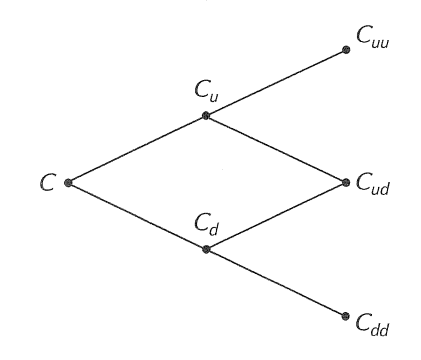

The value of the option at the final nodes of the lattice are
$$ C_{uu} = max(u^2S-100,0) = max(1.1025S -100,0)$$
$$ C_{ud} = max(udS-100,0) = max(S-100,0)$$
$$ C_{dd} = max(d^2S-K,0) = max(0.907S-100,0)$$

Define the risk-neutral probability as
$$ q = \frac{R-d}{u-d} = \frac{1.0001- (1/1.05)}{1.05 - (1/1.05)}= 0.4888$$

The values of the option at the node 1 are
$$ C_u = \frac{1}{R}[qC_{uu}+(1-q)C_{ud}] $$
$$ C_d = \frac{1}{R}[qC_{ud}+(1-q)C_{dd}] $$

The value(price) of the option is
$$ C = \frac{1}{R}[qC_{u}+(1-q)C_{d}] $$

#### (b) Repeat the problem above for an American option

Since the boundary condition, Americian call option never exercise early.Therefore, the price of an American option is same as European option.
$$ C \geq max(S-K, 0)$$

# Problem 3.
Suppose that $u = e^w$, where $w$ is normal with expected value $\bar w$ and variance $\sigma^2$. Then
$$ \bar u = \frac{1}{\sqrt{2\pi\sigma^2}} \int_{-\infty}^{\infty}e^w e^{\frac{-(w-\bar w)^2}{2\sigma^2}}dw $$
Show that
$$ w - \frac{(w- \bar w)^2}{2 \sigma^2} = - \frac{1}{2\sigma^2}[w - (\bar w + \sigma^2)]^2 + \bar w + \frac{\sigma^2}{2}$$
Use the fact that
$$  \frac{1}{\sqrt{2\pi\sigma^2}} \int_{-\infty}^{\infty} e^{\frac{-(x-\bar x)^2}{2\sigma^2}}dx = 1 $$
to evaluate $\bar u$

$$ w - \frac{(w- \bar w)^2}{2 \sigma^2} = - \frac{1}{2\sigma^2}[w - (\bar w + \sigma^2)]^2 + \bar w + \frac{\sigma^2}{2}$$

$$ \bar u = \frac{1}{\sqrt{2\pi\sigma^2}} \int_{-\infty}^{\infty}e^w e^{\frac{-(w-\bar w)^2}{2\sigma^2}}dw  = \frac{1}{\sqrt{2\pi\sigma^2}} \int_{-\infty}^{\infty} e^{w - \frac{(w-\bar w)^2}{2\sigma^2}}dw $$

(Left hand side)  $ w - \frac{(w-\bar w)^2}{2\sigma^2} = \frac{2w \sigma^2 - (w^2 - 2\bar w w + \bar w^2)}{2\sigma^2} $  <br/>
(Right hand side) $ - \frac{1}{2\sigma^2}[w - (\bar w + \sigma^2)]^2 + \bar w + \frac{\sigma^2}{2} = - \frac{w^2 -2w(\bar w+ \sigma^2)+(\bar w + \sigma^2)^2}{2\sigma^2} + \frac{2\bar w \sigma^2}{\sigma^2} + \frac{\sigma^4}{2\sigma^2} = \frac{2w \sigma^2 - (w^2 - 2\bar w w + \bar w^2)}{2\sigma^2}$ <br/>
Therefore, both side are the same.

# Problem 4.
You are considering an investment in a tree farm. Tree grow each year by the following factors:

|YEAR|1|2|3|4|5|6|7|8|9|10|
|------|------|------|------|------|------|------|------|------|------|------|
|Growth|1.6|1.5|1.4|1.3|1.2|1.15|1.1|1.05|1.02|1.01|

The price of lumber follows a binomial lattice with $u = 1.20$ and $d = .9$. The interest rate is constant at 10%. It costs \\$2 million each year, payable at the beginning of the year, to lease the forest land. The initial value of the trees is \\$5 million (assuming they were harvested immediately). You can cut the trees at the end of any year and then not pay rent after that. (For those readers who care, we assume that cut lumber can be stored at no cost.) 

#### (a) Argue that if the rent were zero, you would never cut the trees as long as they were growing. 

In [128]:
### 풀이가 정확하지 않음###

# 기본 가정
S0 = 5 # 단위 : million
P0 = 5 # 단위 : million
u = 1.2
d = 0.9
r = 1.1
R = 20 # 렌트비 2million * 10
t = 10
g = [1, 1.6, 1.5, 1.4, 1.3, 1.2, 1.15, 1.1, 1.05, 1.02, 1.01]
p = (r - d)/(u-d)
price = pd.DataFrame(np.zeros((t+1)*(t+1)).reshape(t+1,t+1))
tree = pd.DataFrame(np.zeros((t+1)*(t+1)).reshape(t+1,t+1))

In [129]:
# 나무 기간별 가치 표 그리기
tree.loc[0,0] = S0
for node in range(t+1):
        for time in range(1, t+1):
            if time >= node:
                tree.loc[node,time] = tree.loc[0,time-1]*g[time]
tree

,0,1,2,3,4,5,6,7,8,9,10
0,5.0,8.0,12.0,16.8,21.84,26.208,30.1392,33.15312,34.810776,35.506992,35.862061
1,0.0,8.0,12.0,16.8,21.84,26.208,30.1392,33.15312,34.810776,35.506992,35.862061
2,0.0,0.0,12.0,16.8,21.84,26.208,30.1392,33.15312,34.810776,35.506992,35.862061
3,0.0,0.0,0.0,16.8,21.84,26.208,30.1392,33.15312,34.810776,35.506992,35.862061
4,0.0,0.0,0.0,0.0,21.84,26.208,30.1392,33.15312,34.810776,35.506992,35.862061
5,0.0,0.0,0.0,0.0,0.00,26.208,30.1392,33.15312,34.810776,35.506992,35.862061
6,0.0,0.0,0.0,0.0,0.00,0.000,30.1392,33.15312,34.810776,35.506992,35.862061
7,0.0,0.0,0.0,0.0,0.00,0.000,0.0000,33.15312,34.810776,35.506992,35.862061
8,0.0,0.0,0.0,0.0,0.00,0.000,0.0000,0.00000,34.810776,35.506992,35.862061
9,0.0,0.0,0.0,0.0,0.00,0.000,0.0000,0.00000,0.000000,35.506992,35.862061


In [133]:
# backword를 통한 판매시 가격 확인하기
# 만기 시 기초자산 가격만 남겨 두기
stree = pd.DataFrame(np.zeros((t+1)*(t+1)).reshape(t+1,t+1))
for node in range(t+1):
    for time in range(t,t+1):
        if time>= node:
            stree.loc[node, time] = tree.loc[node,time]
stree

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.862061
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.862061
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.862061
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.862061
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.862061
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.862061
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.862061
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.862061
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.862061
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.862061


In [136]:
# backward로 가치 계산하기 (실제 시점에 판매가능한 가격)
for node in range(t-1,-1, -1):
    for time in range(t-1, -1,-1):
        if time >= node:
            stree.loc[node, time] = (1/r) * ((p*stree.loc[node, time+1]) +((1-p)*stree.loc[node+1, time+1]))
stree

,0,1,2,3,4,5,6,7,8,9,10
0,13.826377,15.209015,16.729916,18.402908,20.243199,22.267519,24.49427,26.943698,29.638067,32.601874,35.862061
1,0.000000,15.209015,16.729916,18.402908,20.243199,22.267519,24.49427,26.943698,29.638067,32.601874,35.862061
2,0.000000,0.000000,16.729916,18.402908,20.243199,22.267519,24.49427,26.943698,29.638067,32.601874,35.862061
3,0.000000,0.000000,0.000000,18.402908,20.243199,22.267519,24.49427,26.943698,29.638067,32.601874,35.862061
4,0.000000,0.000000,0.000000,0.000000,20.243199,22.267519,24.49427,26.943698,29.638067,32.601874,35.862061
5,0.000000,0.000000,0.000000,0.000000,0.000000,22.267519,24.49427,26.943698,29.638067,32.601874,35.862061
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.49427,26.943698,29.638067,32.601874,35.862061
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,26.943698,29.638067,32.601874,35.862061
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,29.638067,32.601874,35.862061
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,32.601874,35.862061


In [137]:
#판매시 이윤 구하기
profit = pd.DataFrame(np.zeros((t+1)*(t+1)).reshape(t+1,t+1))
for node in range(t+1):
    for time in range(t+1):
        if time >= node:
            profit.loc[node,time] = stree.loc[node, time] - tree.loc[node, time]
profit

,0,1,2,3,4,5,6,7,8,9,10
0,8.826377,7.209015,4.729916,1.602908,-1.596801,-3.940481,-5.64493,-6.209422,-5.172709,-2.905117,0.0
1,0.000000,7.209015,4.729916,1.602908,-1.596801,-3.940481,-5.64493,-6.209422,-5.172709,-2.905117,0.0
2,0.000000,0.000000,4.729916,1.602908,-1.596801,-3.940481,-5.64493,-6.209422,-5.172709,-2.905117,0.0
3,0.000000,0.000000,0.000000,1.602908,-1.596801,-3.940481,-5.64493,-6.209422,-5.172709,-2.905117,0.0
4,0.000000,0.000000,0.000000,0.000000,-1.596801,-3.940481,-5.64493,-6.209422,-5.172709,-2.905117,0.0
5,0.000000,0.000000,0.000000,0.000000,0.000000,-3.940481,-5.64493,-6.209422,-5.172709,-2.905117,0.0
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.64493,-6.209422,-5.172709,-2.905117,0.0
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-6.209422,-5.172709,-2.905117,0.0
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-5.172709,-2.905117,0.0
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-2.905117,0.0


In the 1st~ 3rd year, you need to sell.

#### (b) With rent of $2 million per year, find the best cutting policy and the value of the investment opportunity

In [138]:
# 렌트비용포함 나무 기간별 가치 표 그리기
tree.loc[0,0] = S0
for node in range(t+1):
        for time in range(1, t+1):
            if time >= node:
                tree.loc[node,time] = tree.loc[0,time-1]*g[time] - 2
tree

,0,1,2,3,4,5,6,7,8,9,10
0,5.0,6.0,7.0,7.8,8.14,7.768,6.9332,5.62652,3.907846,1.986003,0.005863
1,0.0,6.0,7.0,7.8,8.14,7.768,6.9332,5.62652,3.907846,1.986003,0.005863
2,0.0,0.0,7.0,7.8,8.14,7.768,6.9332,5.62652,3.907846,1.986003,0.005863
3,0.0,0.0,0.0,7.8,8.14,7.768,6.9332,5.62652,3.907846,1.986003,0.005863
4,0.0,0.0,0.0,0.0,8.14,7.768,6.9332,5.62652,3.907846,1.986003,0.005863
5,0.0,0.0,0.0,0.0,0.00,7.768,6.9332,5.62652,3.907846,1.986003,0.005863
6,0.0,0.0,0.0,0.0,0.00,0.000,6.9332,5.62652,3.907846,1.986003,0.005863
7,0.0,0.0,0.0,0.0,0.00,0.000,0.0000,5.62652,3.907846,1.986003,0.005863
8,0.0,0.0,0.0,0.0,0.00,0.000,0.0000,0.00000,3.907846,1.986003,0.005863
9,0.0,0.0,0.0,0.0,0.00,0.000,0.0000,0.00000,0.000000,1.986003,0.005863


In [139]:
#총 이윤 구하기
profit = pd.DataFrame(np.zeros((t+1)*(t+1)).reshape(t+1,t+1))
for node in range(t+1):
        for time in range(t+1):
            if time >= node:
                profit.loc[node,time] = stree.loc[node,time] - tree.loc[node,time]
profit

,0,1,2,3,4,5,6,7,8,9,10
0,8.826377,9.209015,9.729916,10.602908,12.103199,14.499519,17.56107,21.317178,25.730221,30.615871,35.856198
1,0.000000,9.209015,9.729916,10.602908,12.103199,14.499519,17.56107,21.317178,25.730221,30.615871,35.856198
2,0.000000,0.000000,9.729916,10.602908,12.103199,14.499519,17.56107,21.317178,25.730221,30.615871,35.856198
3,0.000000,0.000000,0.000000,10.602908,12.103199,14.499519,17.56107,21.317178,25.730221,30.615871,35.856198
4,0.000000,0.000000,0.000000,0.000000,12.103199,14.499519,17.56107,21.317178,25.730221,30.615871,35.856198
5,0.000000,0.000000,0.000000,0.000000,0.000000,14.499519,17.56107,21.317178,25.730221,30.615871,35.856198
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.56107,21.317178,25.730221,30.615871,35.856198
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,21.317178,25.730221,30.615871,35.856198
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,25.730221,30.615871,35.856198
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,30.615871,35.856198


The best cutting policy is cutting at 10th year.

# Problem 5.
Problem 5. A gambler starts with an initial fortune of i dollars. On each successive game, the gambler wins \\$1 with probability $p$, $0 < p < 1$, or loses \\$1 with probability $q = 1 − p$ . He will stop if he either accumulates N dollars or loses all his money. What 
is the probability that he will end up with N dollars?

# Problem 6.
Monty Hall problem is a probability puzzle based on an old American show Let's Make a Deal. The problem is named after the show's host. Suppose you're on the show now, and you're given the choice of 3 doors. Behind one door is a car; behind the other two, goats. You don't know ahead of time what is behind each of the doors. You pick one of the doors and announce it. As soon as you pick the door, Monty opens one of the other two doors that he knows has a goat behind it. Then he gives you the option to either keep your original choice or switch to the third door. Should you switch? What is the probability of winning a car if you switch?

Using a switching strategy, you win the car if and only if you originally pick a door with a goat, which has a probability of 2/3 (You pick a door with a goat, Monty shows a door with another goat, so the one you switch to must have a car behind it). If you originally 
picked the door with the car, which has a probability of 1/3, you will lose by switching. So your probability of winning by switching is actually 2/3.